Integrantes: Daniel Giraldo Toro C.C 1000756359
Juan David Uribe Cadavid C.C 1001463742

1. Ejecute el código anterior e identifique cuántas observaciones (n) y cuántas características tiene el dataset


In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

print('Descripción del dataset:')
print(california.DESCR[:1500])
# Vector de caracteristicas de la primera observacion del dataset
print(X[0])
# Lista de las caracteristicas del dataset
print(feature_names)

Descripción del dataset:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. cen

c) El vector de características x para la primera observación del dataset en forma de columna

In [ ]:
# Vector de características de la primera observación del dataset
print(X[0].reshape(-1, 1))
# imprime el Vector de caracteristicas, y a que caracteristica corresponde ese valor del vector
for name, x in zip(feature_names, X[0]):
    print(name, ":", x)


[[   8.3252    ]
 [  41.        ]
 [   6.98412698]
 [   1.02380952]
 [ 322.        ]
 [   2.55555556]
 [  37.88      ]
 [-122.23      ]]
MedInc : 8.3252
HouseAge : 41.0
AveRooms : 6.984126984126984
AveBedrms : 1.0238095238095237
Population : 322.0
AveOccup : 2.5555555555555554
Latitude : 37.88
Longitude : -122.23


 5. Normalización de datos: El preprocesamiento es crucial para el entrenamiento estable de redes neuronales.

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalizar las caracteristicas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6. Implemente la función de inicialización de pesos y sesgo

g) Complete la función. ¿Por qué es conveniente inicializar los pesos con valores aleatorios pequeños en lugar de ceros?

In [ ]:
import numpy as np
def inicializar_parametros(n_caracteristicas):
    '''
    Inicializa los pesos y el sesgo del perceptrón.
    Parámetros:
    -----------
    n_caracteristicas : int
        Número de características de entrada
    Retorna:
    --------
    w : numpy array de forma (n_caracteristicas, 1)
    b : float (escalar)
    '''
    # COMPLETE EL CÓDIGO AQUÍ
    # Inicialice w con valores aleatorios pequeños (usar np.random.randn)
    w = 0.01 * np.random.randn(n_caracteristicas, 1) # el 0.01 para segurar pesos pequeños en los valores aleatorios
    # Inicialice b en cero
    b=0.0;
    return w, b
inicializar_parametros(6) # para probar el codigo

(array([[ 0.00093157],
        [ 0.00816508],
        [-0.00900406],
        [ 0.00239908],
        [ 0.01561782],
        [ 0.00027188]]),
 0.0)

h) Según la notación del capítulo, ¿qué forma debe tener el vector w? Verifique con print(w.shape) después de llamar a su función.

 El vector w debe tener forma de vector columna, es decir, una matriz de tamaño (d × 1). En cuanto a su dimensión, d corresponde al número de características de la matriz de entrenamiento X, cuya dimensión es (n × d), donde n representa el número de muestras. Por lo tanto, el tamaño de w depende directamente del número de características del conjunto de datos, ya que debe existir un peso asociado a cada una. Esta estructura es necesaria para que el producto lineal del perceptrón z = w^T x + b, puede calcularse correctamente, ya que las dimensiones deben ser compatibles para la multiplicación matricial.

In [ ]:
# verificación forma del vector w
import numpy as np
w, b = inicializar_parametros(6)
print(w.shape)

(6, 1)


7. Implementación de la suma ponderada (propagación hacia adelante)

j) Complete la función. Explique por qué usamos X @ w en lugar de w^T @ X cuando X tiene forma (m, n).

In [ ]:
def propagacion_adelante(X, w, b):
    '''
    Calcula la suma ponderada para todas las observaciones.

    Parámetros:
    -----------
    X : numpy array de forma (m, n)
        m observaciones, n características
    w : numpy array de forma (n, 1)
        Vector de pesos
    b : float
        Sesgo

    Retorna:
    --------
    y_pred : numpy array de forma (m, 1)
        Predicciones del modelo
    '''
    # COMPLETE EL CÓDIGO AQUÍ
    # Calcule z = X @ w + b (producto matricial)
    z = X @ w + b
    y_pred = z
    return y_pred

I) Pruebe su función con los primeros 5 ejemplos del conjunto de entrenamiento. Muestre las predicciones iniciales y compárelas con los valores reales. ¿Son buenas predicciones? ¿Por qué?

In [ ]:
import numpy as np
w, b = inicializar_parametros(8)
y_pred_5 = propagacion_adelante(X_train_scaled[:5], w, b)
print("Predicciones iniciales:")
print(y_pred_5)
print("Valores reales:")
print(y_train[:5].reshape(-1,1))

Predicciones iniciales:
[[-0.00453544]
 [ 0.01478196]
 [ 0.0155784 ]
 [ 0.01950761]
 [ 0.00269995]]
Valores reales:
[[1.03 ]
 [3.821]
 [1.726]
 [0.934]
 [0.965]]


Las predicciones iniciales no son buenas, ya que presentan diferencias significativas respecto a los valores reales. Esto ocurre porque los pesos fueron inicializados aleatoriamente y el modelo aún no ha sido entrenado para aprender la relación entre las variables de entrada y el precio de la vivienda.

 8. Función de pérdida

n) Complete la función. ¿Por qué elevamos al cuadrado las diferencias en lugar de usar el valor absoluto?

In [ ]:
def calcular_perdida(y_pred, y_real):
    '''
    Calcula el error cuadrático medio.

    MSE = (1/m) * sum((y_pred - y_real)^2)
    '''

    m = X_train_scaled.shape[0]
    mse = (1/m) * np.sum((y_pred - y_real) ** 2)

    return mse

o) Calcule la pérdida inicial (con los pesos aleatorios). Guarde este valor para compararlo después del entrenamiento.

In [ ]:
w, b = inicializar_parametros(X_train_scaled.shape[1])
y_train = y_train.reshape(-1, 1)   # asegurar forma columna
y_pred = propagacion_adelante(X_train_scaled, w, b)
perdida_inicial = calcular_perdida(y_pred, y_train)
print("Pérdida inicial (MSE):", perdida_inicial)

Pérdida inicial (MSE): 5.627793910947898


10. Implemente la función de cálculo de gradientes

v) Complete la función siguiendo las fórmulas derivadas en la pregunta anterior.

In [ ]:
def calcular_gradientes(X, y_pred, y_real):
    '''
    Calcula los gradientes de la pérdida respecto a w y b.

    Parámetros:
    -----------
    X : numpy array de forma (m, n)
    y_pred : numpy array de forma (m, 1)
    y_real : numpy array de forma (m, 1)

    Retorna:
    --------
    dw : numpy array de forma (n, 1) - gradiente respecto a w
    db : float - gradiente respecto a b
    '''
    m = X.shape[0]
    error = y_pred - y_real.reshape(-1, 1)

    # COMPLETE EL CÓDIGO AQUÍ
    # dw = ...
    dw = (2/m) * (X.T @ error)
    # db = ...
    db = (2/m) * np.sum(error)
    return dw, db


w) Verifique que dw tenga la misma forma que w. ¿Por qué es esto necesario para la actualización?

In [ ]:
w, b = inicializar_parametros(X_train_scaled.shape[1])
y_pred = propagacion_adelante(X_train_scaled, w, b)
dw, db = calcular_gradientes(X_train_scaled, y_pred, y_train)
print("Forma de w:", w.shape)
print("Forma de dw:", dw.shape)

Forma de w: (8, 1)
Forma de dw: (8, 1)


11. Actualización de parámetros

y) Complete la función

In [ ]:
def actualizar_parametros(w, b, dw, db, learning_rate):
    '''
    Actualiza los pesos y sesgo usando gradiente descendente.

    w_nuevo = w - learning_rate * dw
    b_nuevo = b - learning_rate * db
    '''
    # COMPLETE EL CÓDIGO AQUÍ
    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w, b

aa) Ejecute una iteración completa: propagación adelante → cálculo de pérdida → gradientes → actualización. Compare la pérdida antes y después. ¿Disminuyó?

In [ ]:
import numpy as np

# Inicializar parametros con el número de características de entrenamiento
w, b = inicializar_parametros(X_train_scaled.shape[1])

# 1) Propagacion adelante (con X normalizado)
y_pred = propagacion_adelante(X_train_scaled, w, b)

# 2) Calculo de perdida
perdida_antes = calcular_perdida(y_pred, y_train)

# 3) Gradientes
dw, db = calcular_gradientes(X_train_scaled, y_pred, y_train)

# 4) Actualizar parametros
learning_rate = 0.01   # tasa de aprendizaje de inicio
w_nuevo, b_nuevo = actualizar_parametros(w, b, dw, db, learning_rate)

# 5) Forward con parámetros actualizados
y_pred_nuevo = propagacion_adelante(X_train_scaled, w_nuevo, b_nuevo)

# 6) Perdida despus
perdida_despues = calcular_perdida(y_pred_nuevo, y_train)

print("Pérdida antes:", perdida_antes)
print("Pérdida después:", perdida_despues)

if perdida_despues < perdida_antes:
    print("¿Disminuyó?: sí")
else:
    print("¿Disminuyó?: no")


Pérdida antes: 5.632702420985446
Pérdida después: 5.434024110483673
¿Disminuyó?: sí


La pérdida disminuyó después de realizar la actualización, esto se debe a que los pesos fueron ajustados utilizando el gradiente y una tasa de aprendizaje adecuada, dejando a la función del gradiente en una zona en la dirección de máximo descenso de la función de pérdida

12. Implemente el ciclo de entrenamiento completo

bb) Complete la función integrando todas las funciones anteriores. (5 pts)

In [ ]:
import numpy as np

def entrenar_perceptron(X_train_scaled, y_train, learning_rate=0.01, epochs=1000):
    '''
    Entrena un perceptrón para regresión (usando X normalizado/estandarizado).

    Parámetros:
    -----------
    X_train_scaled : numpy array (m, n)  -> X ya escalado (StandardScaler)
    y_train        : numpy array (m,) o (m,1)
    learning_rate  : float
    epochs         : int

    Retorna:
    --------
    w, b : parámetros entrenados
    historial_perdida : lista con la pérdida (MSE) en cada época
    '''
    # Calcular parametros iniciales
    n_caracteristicas = X_train_scaled.shape[1]
    w, b = inicializar_parametros(n_caracteristicas)
    historial_perdida = []

    for epoca in range(epochs):
        # 1. Propagacion adelante
        y_pred = propagacion_adelante(X_train_scaled, w, b)

        # 2. Calcular perdida y guardar en historial
        perdida = calcular_perdida(y_pred, y_train)
        historial_perdida.append(perdida)

        # 3. Calcular gradientes
        dw, db = calcular_gradientes(X_train_scaled, y_pred, y_train)

        # 4. Actualizar parametros
        w, b = actualizar_parametros(w, b, dw, db, learning_rate)

        if epoca % 100 == 0:
            print(f'Época {epoca}, Pérdida: {perdida:.4f}')

    return w, b, historial_perdida


cc) Entrene el modelo con learning_rate=0.01 y epochs=1000. Grafique el historial de pérdida (época vs MSE). Incluya la gráfica en su entrega. (4 pts)

Época 0, Pérdida: 5.6334
Época 100, Pérdida: 0.7119
Época 200, Pérdida: 0.5965
Época 300, Pérdida: 0.5741
Época 400, Pérdida: 0.5590
Época 500, Pérdida: 0.5481
Época 600, Pérdida: 0.5401
Época 700, Pérdida: 0.5343
Época 800, Pérdida: 0.5301
Época 900, Pérdida: 0.5269


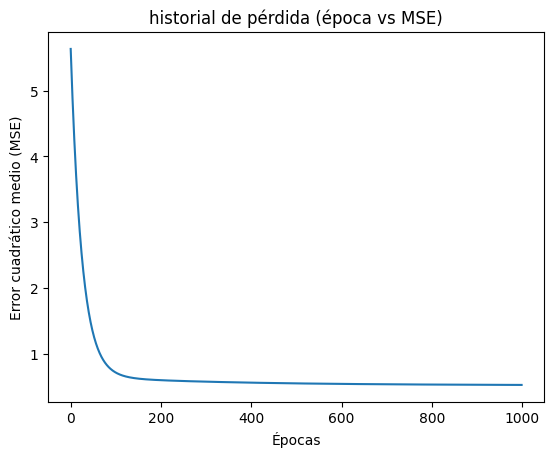

In [ ]:
w, b, historial_perdida = entrenar_perceptron(X_train_scaled, y_train, learning_rate=0.01, epochs=1000)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(historial_perdida)
plt.xlabel("Épocas")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("historial de pérdida (época vs MSE)")
plt.show()

ee) Experimente con diferentes tasas de aprendizaje: 0.001, 0.01, 0.1, 1.0. Grafique las 4 curvas de pérdida en un mismo plot. ¿Cuál funciona mejor? ¿Alguna diverge?

Época 0, Pérdida: 5.6442
Época 100, Pérdida: 3.9884
Época 200, Pérdida: 2.8824
Época 300, Pérdida: 2.1421
Época 400, Pérdida: 1.6458
Época 500, Pérdida: 1.3123
Época 600, Pérdida: 1.0878
Época 700, Pérdida: 0.9361
Época 800, Pérdida: 0.8332
Época 900, Pérdida: 0.7631
Época 0, Pérdida: 5.6686
Época 100, Pérdida: 0.7123
Época 200, Pérdida: 0.5962
Época 300, Pérdida: 0.5739
Época 400, Pérdida: 0.5589
Época 500, Pérdida: 0.5480
Época 600, Pérdida: 0.5401
Época 700, Pérdida: 0.5343
Época 800, Pérdida: 0.5301
Época 900, Pérdida: 0.5270
Época 0, Pérdida: 5.6188
Época 100, Pérdida: 0.5246
Época 200, Pérdida: 0.5184
Época 300, Pérdida: 0.5180
Época 400, Pérdida: 0.5179
Época 500, Pérdida: 0.5179
Época 600, Pérdida: 0.5179
Época 700, Pérdida: 0.5179
Época 800, Pérdida: 0.5179
Época 900, Pérdida: 0.5179
Época 0, Pérdida: 5.6299
Época 100, Pérdida: 11208845228383893766116018744540569864123695650449835857842770253088802143615562089903960358912.0000
Época 200, Pérdida: 823324785087014490341389762502

/tmp/ipython-input-3965386330.py:9: RuntimeWarning: overflow encountered in square
  mse = (1/m) * np.sum((y_pred - y_real) ** 2)
/tmp/ipython-input-2897777988.py:21: RuntimeWarning: overflow encountered in matmul
  dw = (2/m) * (X.T @ error)
/tmp/ipython-input-1167838735.py:21: RuntimeWarning: invalid value encountered in matmul
  z = X @ w + b


Época 800, Pérdida: nan
Época 900, Pérdida: nan


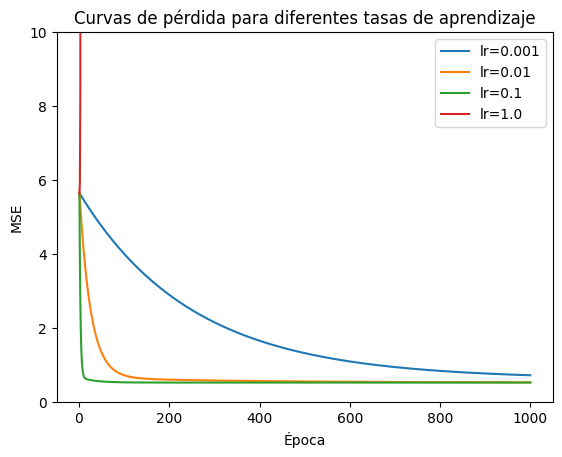

In [ ]:
import matplotlib.pyplot as plt

learning_rates = [0.001, 0.01, 0.1, 1.0]
historiales = {}

for lr in learning_rates:
    _, _, hist = entrenar_perceptron(X_train_scaled, y_train, learning_rate=lr, epochs=1000);
    historiales[lr] = hist;

plt.figure()
for lr in learning_rates:
    plt.plot(range(1, len(historiales[lr])+1), historiales[lr], label=f"lr={lr}");

plt.xlabel("Época")
plt.ylim(0, 10)
plt.ylabel("MSE")
plt.title("Curvas de pérdida para diferentes tasas de aprendizaje")
plt.legend()
plt.show()

Época 0, Pérdida: 5.6162
Época 100, Pérdida: 3.9696
Época 200, Pérdida: 2.8693
Época 300, Pérdida: 2.1327
Época 400, Pérdida: 1.6388
Época 500, Pérdida: 1.3069
Época 600, Pérdida: 1.0835
Época 700, Pérdida: 0.9326
Época 800, Pérdida: 0.8304
Época 900, Pérdida: 0.7607
Época 0, Pérdida: 5.6675
Época 100, Pérdida: 0.7103
Época 200, Pérdida: 0.5949
Época 300, Pérdida: 0.5730
Época 400, Pérdida: 0.5583
Época 500, Pérdida: 0.5476
Época 600, Pérdida: 0.5398
Época 700, Pérdida: 0.5341
Época 800, Pérdida: 0.5299
Época 900, Pérdida: 0.5269
Época 0, Pérdida: 5.6414
Época 100, Pérdida: 0.5246
Época 200, Pérdida: 0.5184
Época 300, Pérdida: 0.5180
Época 400, Pérdida: 0.5179
Época 500, Pérdida: 0.5179
Época 600, Pérdida: 0.5179
Época 700, Pérdida: 0.5179
Época 800, Pérdida: 0.5179
Época 900, Pérdida: 0.5179
Época 0, Pérdida: 5.6074
Época 100, Pérdida: 15274007354299834192765447805498667225443260820447613219370129361616542120557137074693309726720.0000
Época 200, Pérdida: 112192368466393139948285296733

/tmp/ipython-input-3965386330.py:9: RuntimeWarning: overflow encountered in square
  mse = (1/m) * np.sum((y_pred - y_real) ** 2)
/tmp/ipython-input-2897777988.py:21: RuntimeWarning: overflow encountered in matmul
  dw = (2/m) * (X.T @ error)
/tmp/ipython-input-1167838735.py:21: RuntimeWarning: invalid value encountered in matmul
  z = X @ w + b


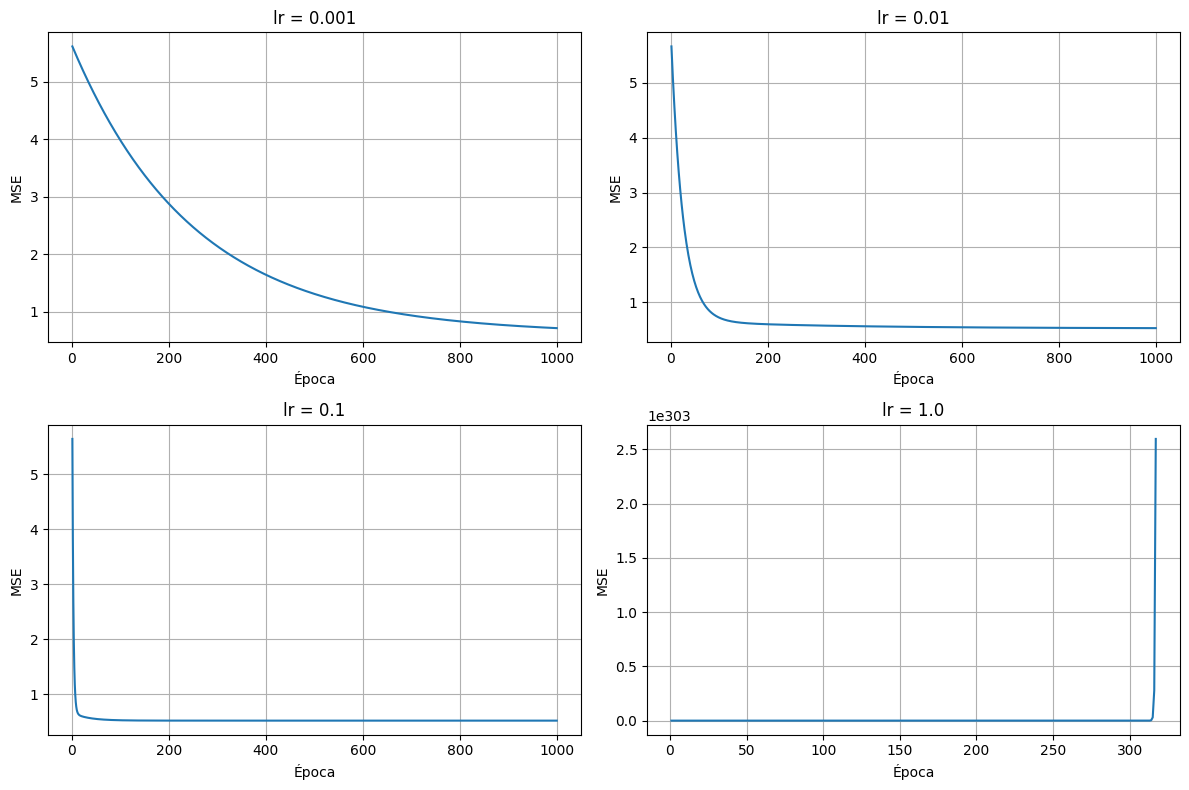

In [ ]:
## Dado a que la# Debido a que la curva correspondiente a la tasa de aprendizaje 1.0 diverge
# y no se visualiza claramente cuando todas las curvas se grafican juntas,
# se representan en subgráficas separadas para facilitar la interpretación
# y observar con mayor detalle el comportamiento de cada tasa.

import matplotlib.pyplot as plt

learning_rates = [0.001, 0.01, 0.1, 1.0]
historiales = {}

for lr in learning_rates:
    _, _, hist = entrenar_perceptron(
        X_train_scaled,
        y_train,
        learning_rate=lr,
        epochs=1000
    )
    historiales[lr] = hist

fig, axs = plt.subplots(2, 2, figsize=(12,8))

axs = axs.flatten()

for i, lr in enumerate(learning_rates):
    axs[i].plot(range(1, len(historiales[lr])+1), historiales[lr])
    axs[i].set_title(f"lr = {lr}")
    axs[i].set_xlabel("Época")
    axs[i].set_ylabel("MSE")
    axs[i].grid(True)

plt.tight_layout()
plt.show()


 13. Evaluación en el conjunto de prueba

ff) Usando los parámetros w y b entrenados, calcule las predicciones en X_test_scaled.

In [ ]:
# Para hacerlo mas ordenado, se vuelve a llamar la funcion entrenar_perceptron, para que trabaje con los ultimos parametros que retornen y se sepa cuuales son los parameteros w y b
def entrenar_perceptron(X_train_scaled, y_train, learning_rate=0.01, epochs=1000):
    '''
    Entrena un perceptrón para regresión (usando X normalizado/estandarizado).

    Parámetros:
    -----------
    X_train_scaled : numpy array (m, n)  -> X ya escalado (StandardScaler)
    y_train        : numpy array (m,) o (m,1)
    learning_rate  : float
    epochs         : int

    Retorna:
    --------
    w, b : parámetros entrenados
    historial_perdida : lista con la pérdida (MSE) en cada época
    '''
    # Calcular parametros iniciales
    n_caracteristicas = X_train_scaled.shape[1]
    w, b = inicializar_parametros(n_caracteristicas)
    historial_perdida = []

    for epoca in range(epochs):
        # 1. Propagación adelante
        y_pred = propagacion_adelante(X_train_scaled, w, b)

        # 2. Calcular pérdida y guardar en historial
        perdida = calcular_perdida(y_pred, y_train)
        historial_perdida.append(perdida)

        # 3. Calcular gradientes
        dw, db = calcular_gradientes(X_train_scaled, y_pred, y_train)

        # 4. Actualizar parámetros
        w, b = actualizar_parametros(w, b, dw, db, learning_rate)

    return w, b, historial_perdida

w, b, historial_perdida = entrenar_perceptron(X_train_scaled, y_train, learning_rate=0.01, epochs=1000)

print(f'vector de pesos usado: {w} ')
print(f'sesgo usado: {b} ')

# Predicciones sobre el conjunto de prueba
y_test_pred = propagacion_adelante(X_test_scaled, w, b)

print("Vector de predicciones:")
print(y_test_pred)

print("\nVector de valores reales de prueba:")
print(y_test.reshape(-1, 1))



vector de pesos usado: [[ 0.85752158]
 [ 0.14994737]
 [-0.25174528]
 [ 0.28045245]
 [ 0.00704203]
 [-0.04340927]
 [-0.68522654]
 [-0.65610629]] 
sesgo usado: 2.0719469338916694 
Vector de predicciones:
[[0.79737158]
 [1.70901303]
 [2.6302865 ]
 ...
 [4.42579479]
 [1.30576762]
 [1.95640339]]

Vector de valores reales de prueba:
[[0.477  ]
 [0.458  ]
 [5.00001]
 ...
 [5.00001]
 [0.723  ]
 [1.515  ]]


gg) Calcule el MSE en el conjunto de prueba. ¿Es mayor o menor que el MSE final de entrenamiento? ¿Qué indica esto sobre la generalización del modelo?

In [ ]:
# Predicciones en test
y_test_pred = propagacion_adelante(X_test_scaled, w, b)

# Calcular MSE en test
mse_test = calcular_perdida(y_test_pred, y_test)

# MSE final de entrenamiento
mse_train_final = historial_perdida[-1]

print("MSE para el conjunto de prueba:", mse_test)
print("MSE entrenamiento (final):", mse_train_final)

MSE para el conjunto de prueba: 0.1386174326153012
MSE entrenamiento (final): 0.524527973346787


El MSE en el conjunto de prueba es menor que el MSE final de entrenamiento. Esto indica que el modelo generaliza adecuadamente y no presenta sobreajuste. La diferencia puede deberse a variaciones estadísticas entre los conjuntos o a que el conjunto de prueba sea ligeramente menos complejo que el de entrenamiento.

hh) Cree un scatter plot comparando y_test (eje x) vs predicciones (eje y). Añada una línea diagonal y = x. ¿Qué tan cerca están los puntos de esta línea ideal?

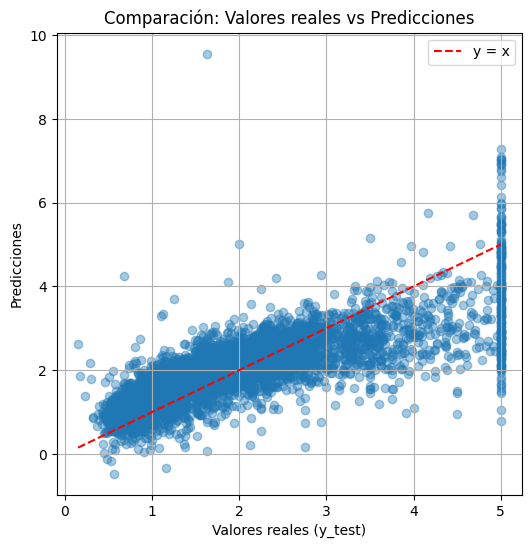

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.4)

# Linea ideal y = x
min_val = min(y_test)
max_val = max(y_test)

plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x")
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones")
plt.title("Comparación: Valores reales vs Predicciones")
plt.legend()
plt.grid(True)
plt.show()

ii) Calcule el coeficiente de determinación R². Interprete el resultado

In [ ]:
# Formula R²
SS_res = np.sum((y_test - y_test_pred)**2)
SS_tot = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - (SS_res / SS_tot)
print("R²:", R2)

R²: 0.5768727628793202


el modelo ha aprendido una relación significativa entre las entradas y la salida, pero no alcanza un ajuste perfecto.